<a href="https://colab.research.google.com/github/aureliodeboa/Deep-Learning/blob/main/Unidade_6_Redes_Neurais_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Unidade 6 - Treinamento e Avaliação de Redes Neurais
![](https://imgur.com/rtjSpZB.png)

## 🌟 Visão Geral

Neste notebook, vamos explorar o processo de treinamento e avaliação de redes neurais.

- **🔄 Processo de Treinamento de Redes Neurais**: Compreender o que envolve o treinamento de uma rede neural e o papel crucial dos dados de treino.
  
- **📉 Algoritmo de Retropropagação**: Explorar como a retropropagação ajusta os pesos das redes neurais para minimizar o erro.

- **📈 Métricas de Avaliação de Desempenho**: Medir a precisão do modelo utilizando diversas métricas.



## 📚 Índice
1. [Processo de Treinamento de Redes Neurais](#sec1)
2. [Algoritmo de Retropropagação](#sec2)
3. [Métricas de Avaliação de Desempenho](#sec5)
4. [Conclusão](#sec6)



# 1. 🔄 Processo de Treinamento de Redes Neurais <a name="sec1"></a>



## ⚙️ Definição de Treinamento
O treinamento de uma rede neural envolve ajustar os pesos das conexões entre os neurônios para minimizar o erro de previsão.

## 📊 Papel dos Dados de Treino
Os dados de treino são fundamentais para ensinar a rede. Dividimos os dados em conjuntos de treino e teste para validar o modelo.

## 🔍 Importância da Separação Treino/Teste
- **Treino**: Dados utilizados para ajustar os pesos do modelo.
- **Teste**: Dados utilizados para avaliar o desempenho do modelo em dados não vistos.
- **Quantidade da divisāo**: É uma prática comum reservar cerca de 20-30% dos dados para teste para garantir que o modelo generalize bem. A proporção ideal pode variar com base no tamanho total dos dados e na variabilidade deles.

## 🌙 Exemplo: Gerando e Dividindo os Dados

Neste exemplo, usamos a função `make_moons` da biblioteca `sklearn.datasets` para gerar dados sintéticos em forma de duas luas. Isso é útil para testar algoritmos de classificação e visualização.

### Parâmetros de make_moons
- **n_samples**: Número de amostras a serem geradas. No exemplo, usamos 1000 amostras.
- **noise**: Grau de sobreposição entre as classes. Um valor de 0.3 adiciona uma quantidade moderada de ruído aos dados.
- **random_state**: Semente para o gerador de números aleatórios, garantindo reprodutibilidade dos resultados.


In [ ]:
#Imports
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:


# 🌙 Gerar dados com make_moons
# make_moons cria um conjunto de dados em forma de lua com dois clusters, ideal para testar classificadores.
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# 📊 Dividir os dados em treino e teste
# train_test_split é usado para dividir os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")


Tamanho do conjunto de treino: 700
Tamanho do conjunto de teste: 300


## 🔍 Visualizando os Dados Gerados com `make_moons`

Para entender melhor os dados que estamos usando, vamos visualizar o conjunto de dados gerado pela função `make_moons`. Esta visualização nos permitirá ver a distribuição dos pontos de dados e a separabilidade entre as classes.

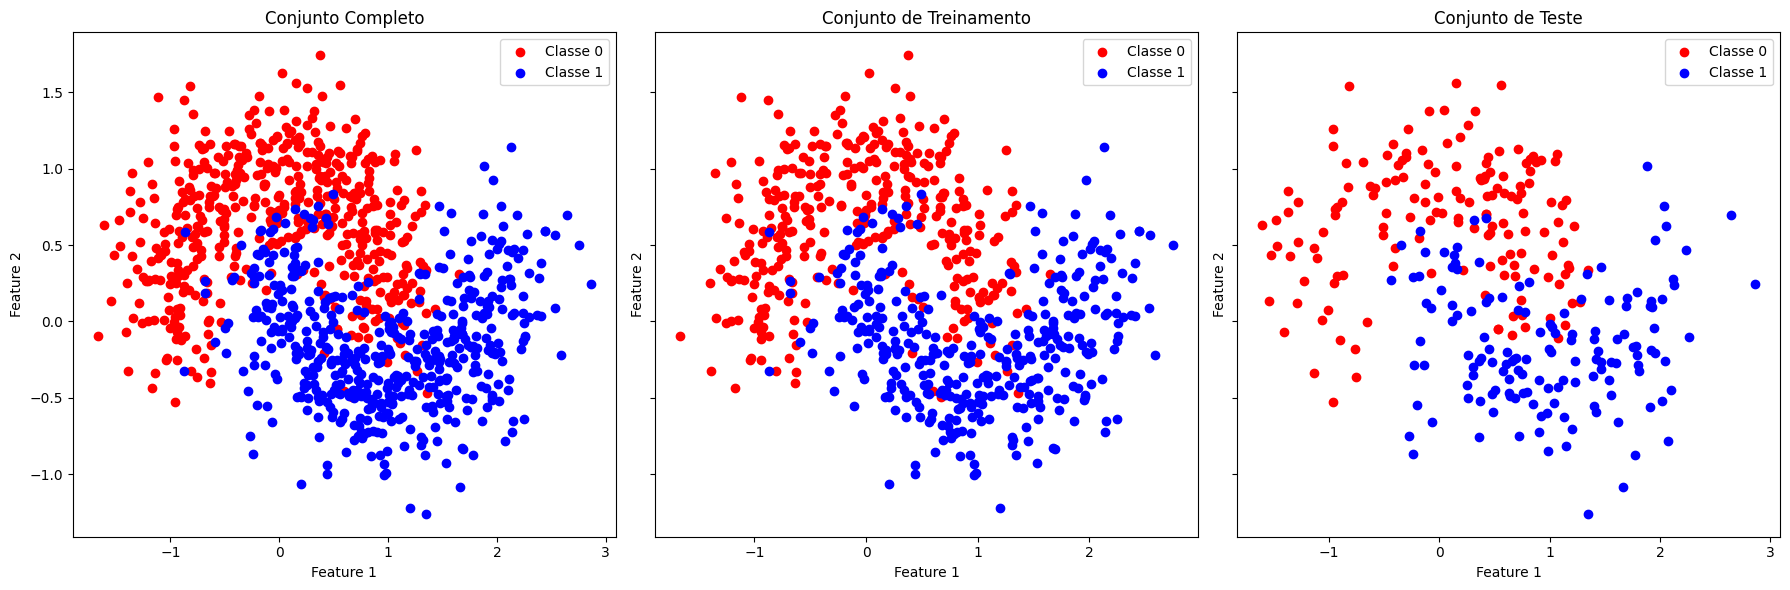

(array([[-0.17186341,  0.59624885],
        [ 1.25328273, -0.26541353],
        [ 0.72322405,  0.2319425 ],
        ...,
        [ 1.77095705, -0.50943619],
        [-1.06177158,  0.006786  ],
        [ 0.76117231,  0.65196041]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# Visualizar os dados
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dados completos
axs[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
axs[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
axs[0].set_title('Conjunto Completo')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend()

# Dados de treinamento
axs[1].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
axs[1].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1')
axs[1].set_title('Conjunto de Treinamento')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].legend()

# Dados de teste
axs[2].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Classe 0')
axs[2].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Classe 1')
axs[2].set_title('Conjunto de Teste')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')
axs[2].legend()

plt.tight_layout()
plt.show()

X, y

# 2. 📉 Algoritmo de Retropropagação <a name="sec2"></a>



## 🔄 Conceito e Importância
A retropropagação é um algoritmo essencial para o treinamento de redes neurais, permitindo o ajuste eficiente dos pesos.

## 📉 Passo a Passo do Algoritmo
1. **Forward Pass**: Calcula a saída para uma dada entrada. ➡️
2. **Cálculo do Erro**: Compara a saída prevista com a saída real. 🔍
3. **Backward Pass**: Propaga o erro de volta pela rede e ajusta os pesos. ⬅️

## 🌟 Funções de Ativação nas Camadas Ocultas
No `MLPClassifier` do `sklearn`, a função de ativação padrão para as camadas ocultas é a ReLU (Rectified Linear Unit).

### Por que ReLU?
- **Eficiência Computacional**: ReLU é computacionalmente eficiente, pois envolve apenas operações simples (máximo entre zero e o valor da entrada).
am treinadas de forma mais eficaz.

### Como ReLU Funciona?
A função ReLU é definida como: `ReLU(x) = \max(0, x)`

Isso significa que qualquer valor de entrada negativo é convertido em zero, enquanto valores positivos permanecem inalterados.

## 🌟 Função de Ativação da Saída
A função de ativação da camada de saída depende do tipo de problema que estamos resolvendo:
- **Classificação Binária**: `logistic` (função sigmoide) é usada.
- **Classificação Multiclasse**: `softmax` é usada.
- **Regressão**: `identity` é usada.

No nosso exemplo de classificação binária, a função de ativação da saída padrão é `logistic`.

## 🌟 Treinamento da Rede
Vamos mostrar de forma didática como o processo de treinamento (fit) ajusta os pesos da rede.

## 🌟 Acurácia do Modelo
`accuracy_score` mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Vamos calcular e explicar como ele é feito.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Modelo MLP simples com função de ativação padrão (ReLU para camadas ocultas)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', max_iter=1000, random_state=42)

# Treinamento da Rede
mlp.fit(X_train, y_train)

# Avaliação e Acurácia
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Acurácia no treino: {train_accuracy:.2f}')
print(f'Acurácia no teste: {test_accuracy:.2f}')


Acurácia no treino: 0.85
Acurácia no teste: 0.86


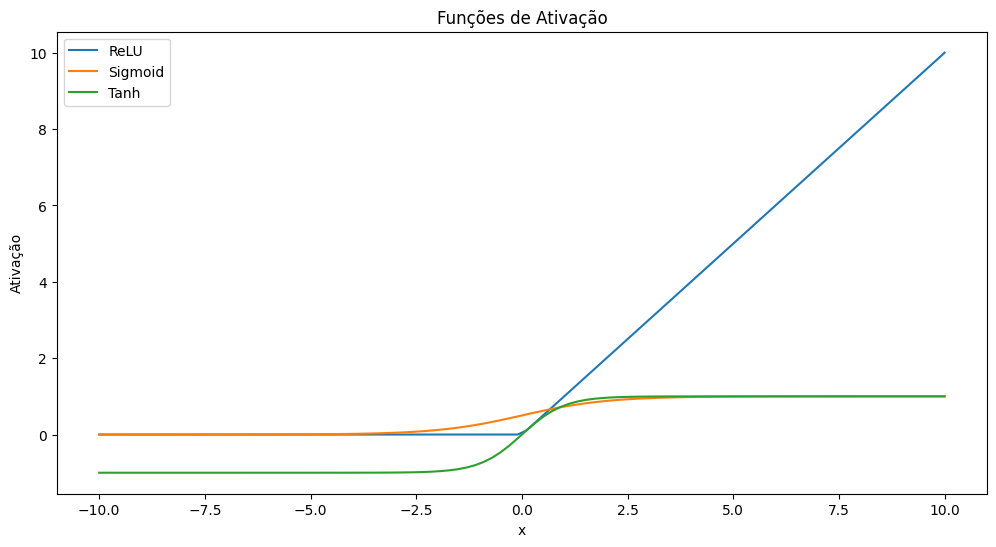

In [ ]:
# Mostrar Funções de Ativação
def plot_activation_functions():
    x = np.linspace(-10, 10, 100)
    activations = {
        'ReLU': np.maximum(0, x),
        'Sigmoid': 1 / (1 + np.exp(-x)),
        'Tanh': np.tanh(x)
    }

    fig, ax = plt.subplots(figsize=(12, 6))
    for name, values in activations.items():
        ax.plot(x, values, label=name)
    ax.set_xlabel('x')
    ax.set_ylabel('Ativação')
    ax.set_title('Funções de Ativação')
    ax.legend()
    plt.show()

plot_activation_functions()

# 3. 📏 Métricas de Avaliação de Desempenho <a name="sec5"></a>

## 🌟 Importância das Métricas de Avaliação

Avaliar o desempenho de um modelo de aprendizado de máquina é crucial para entender sua eficácia e compará-lo com outros modelos. As métricas de avaliação fornecem uma forma quantificável de medir a precisão, robustez e capacidade de generalização de um modelo.

## 🌟 Principais Métricas de Avaliação

1. **Precisão (Precision)**
    - A precisão é a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas (TP + FP).
    - É útil quando o custo de falsos positivos é alto.

2. **Revocação (Recall)**
    - A revocação é a proporção de verdadeiros positivos (TP) em relação ao total de casos positivos reais (TP + FN).
    - É útil quando o custo de falsos negativos é alto.

3. **F1-Score**
    - O F1-Score é a média harmônica da precisão e da revocação, proporcionando um equilíbrio entre as duas.

4. **Suporte (Support)**
    - O suporte é o número de ocorrências reais de cada classe no conjunto de dados.

## 🌟 Exemplo em Python

Vamos usar um exemplo simples para ilustrar essas métricas de avaliação com o `MLPClassifier` do `sklearn`.



Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       160
           1       0.95      0.99      0.97       140

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



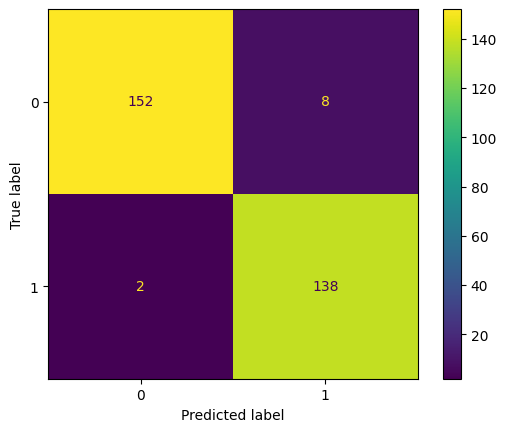

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Gerar dados com make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.01, max_iter=1000, random_state=42)

# Treinar o modelo
mlp.fit(X_train, y_train)

# Previsões
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# Exibir Relatório de Classificação
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Exibir Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mlp.classes_)
disp.plot()
plt.show()

# 4. 🔍 Conclusão <a name="sec6"></a>

## 🌟 Revisão da Aula

Nesta aula, exploramos os fundamentos e as técnicas essenciais para o treinamento e avaliação de redes neurais. Vamos revisar os principais pontos abordados:

1. **Processo de Treinamento de Redes Neurais**:
   - Aprendemos sobre a importância dos dados de treino e a divisão em conjuntos de treino e teste. ⚙️
   - Vimos como o treinamento de uma rede neural envolve ajustar os pesos das conexões para minimizar o erro de previsão.

2. **Algoritmo de Retropropagação**:
   - Compreendemos o conceito e a importância do algoritmo de retropropagação, que permite o ajuste eficiente dos pesos durante o treinamento. 🔄
   - Detalhamos o passo a passo do algoritmo, incluindo a passagem forward, cálculo do erro e passagem backward.

3. **Métricas de Avaliação de Desempenho**:
   - Aprendemos sobre as principais métricas de avaliação de desempenho, incluindo precisão, revocação, F1-Score e a matriz de confusão.
   - Utilizamos exemplos práticos em Python para calcular essas métricas e entender a performance do modelo. 📏
